<h1 align="center">Spotify Recommendation System</h1>


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tqdm
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

## Import Data

In [161]:
!chmod 600 /home/codespace/.kaggle/kaggle.json

In [162]:
import zipfile

# The name of the zip file
zip_file = 'spotify-dataset.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # Extract all the contents of the zip file in the current directory
    zip_ref.extractall()

## EDA

In [163]:
df = pd.read_csv('data/data.csv')
df_bgenres = pd.read_csv('data/data_by_genres.csv')
df_artists = pd.read_csv('data/data_by_artist.csv')
df_year = pd.read_csv('data/data_by_year.csv')
df_wgenres = pd.read_csv('data/data_w_genres.csv')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [165]:
df_bgenres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [166]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [167]:
df_wgenres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [168]:
df['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [169]:
df['release_yr'] = [x.split('-')[0] for x in df['release_date']]

Choosing the songs after 2000 only 

In [170]:
df = df[df['release_yr']>='2000']
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,release_yr
15606,0.285,2000,0.00239,['Coldplay'],0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,2000-07-10,0.0281,173.372,2000
15607,0.613,2000,0.14300,['OutKast'],0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,2000-10-31,0.2690,94.948,2000
15608,0.400,2000,0.00958,['Linkin Park'],0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,2000-10-24,0.0584,105.143,2000
15609,0.543,2000,0.00664,['3 Doors Down'],0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,2000,0.0286,99.009,2000
15610,0.760,2000,0.03020,['Eminem'],0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,2000-05-23,0.0572,104.504,2000


Artists contains [], ' and ", so we'll remove those with regex.

In [171]:
import regex as re

In [172]:
def strtoll(x):
    x = re.sub(r" ", "_", x)
    fin = re.sub("[\'\"\[\]]","",x).split(",")
    return fin

In [173]:
df['artists'] = df['artists'].apply(strtoll)

In [174]:
addition = lambda row: str(row['artists'][0]) + ' - ' + str(row['name'])

In [175]:
df['artists_song'] = df.apply(addition, axis=1)

In [176]:
df = df.drop_duplicates('artists_song')

In [177]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,release_yr,artists_song
15606,0.285,2000,0.00239,[Coldplay],0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,2000-07-10,0.0281,173.372,2000,Coldplay - Yellow
15607,0.613,2000,0.14300,[OutKast],0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,2000-10-31,0.2690,94.948,2000,OutKast - Ms. Jackson
15608,0.400,2000,0.00958,[Linkin_Park],0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,2000-10-24,0.0584,105.143,2000,Linkin_Park - In the End
15609,0.543,2000,0.00664,[3_Doors_Down],0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,2000,0.0286,99.009,2000,3_Doors_Down - Kryptonite
15610,0.760,2000,0.03020,[Eminem],0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,2000-05-23,0.0572,104.504,2000,Eminem - The Real Slim Shady


## Visualizing song data b/w 2000 and 2020

In [178]:
df_yr = pd.read_csv('data/data_by_year.csv')
df_yr = df_yr[df_yr['year'] >= 2000]

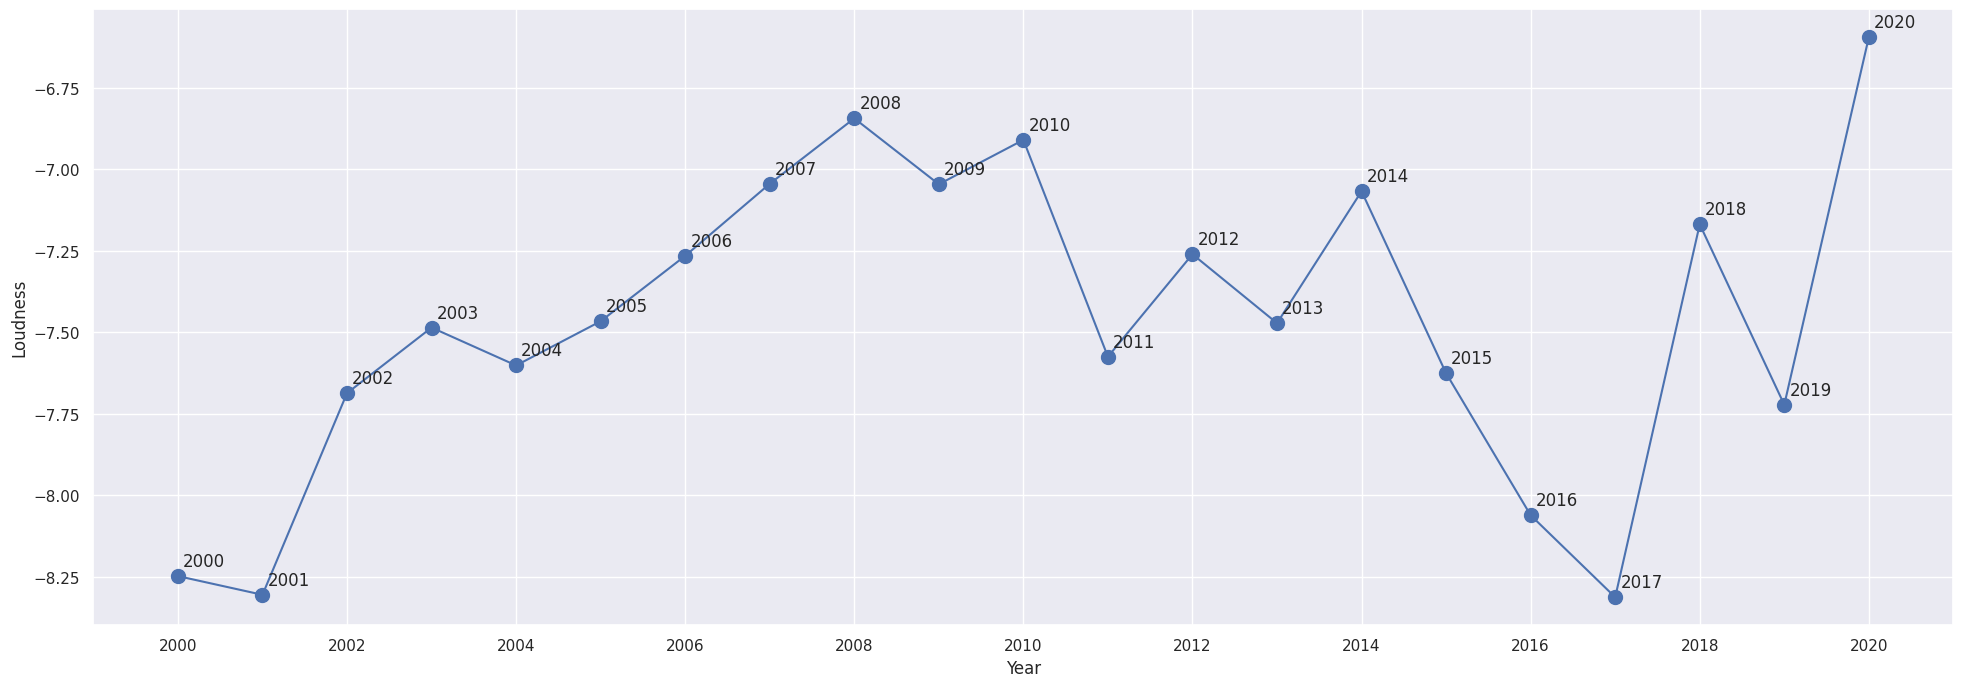

In [179]:
#sample plot of a parameter over the years
plt.rcParams["figure.figsize"] = (24,8)
plt.plot(df_yr["year"],df_yr["loudness"],label="loudness",marker=".",markersize=20)
for i in df_yr["year"]:
    plt.annotate(str(i),(i+0.06,df_yr[df_yr["year"] == i]["loudness"]+0.03))
plt.xlabel('Year')
plt.ylabel('Loudness')
plt.xticks(np.arange(2000, 2021, 2))
plt.show()

([<matplotlib.axis.XTick at 0x7f3186131030>,
 [Text(2000, 0, '2000'),
  Text(2002, 0, '2002'),
  Text(2004, 0, '2004'),
  Text(2006, 0, '2006'),
  Text(2008, 0, '2008'),
  Text(2010, 0, '2010'),
  Text(2012, 0, '2012'),
  Text(2014, 0, '2014'),
  Text(2016, 0, '2016'),
  Text(2018, 0, '2018'),
  Text(2020, 0, '2020')])

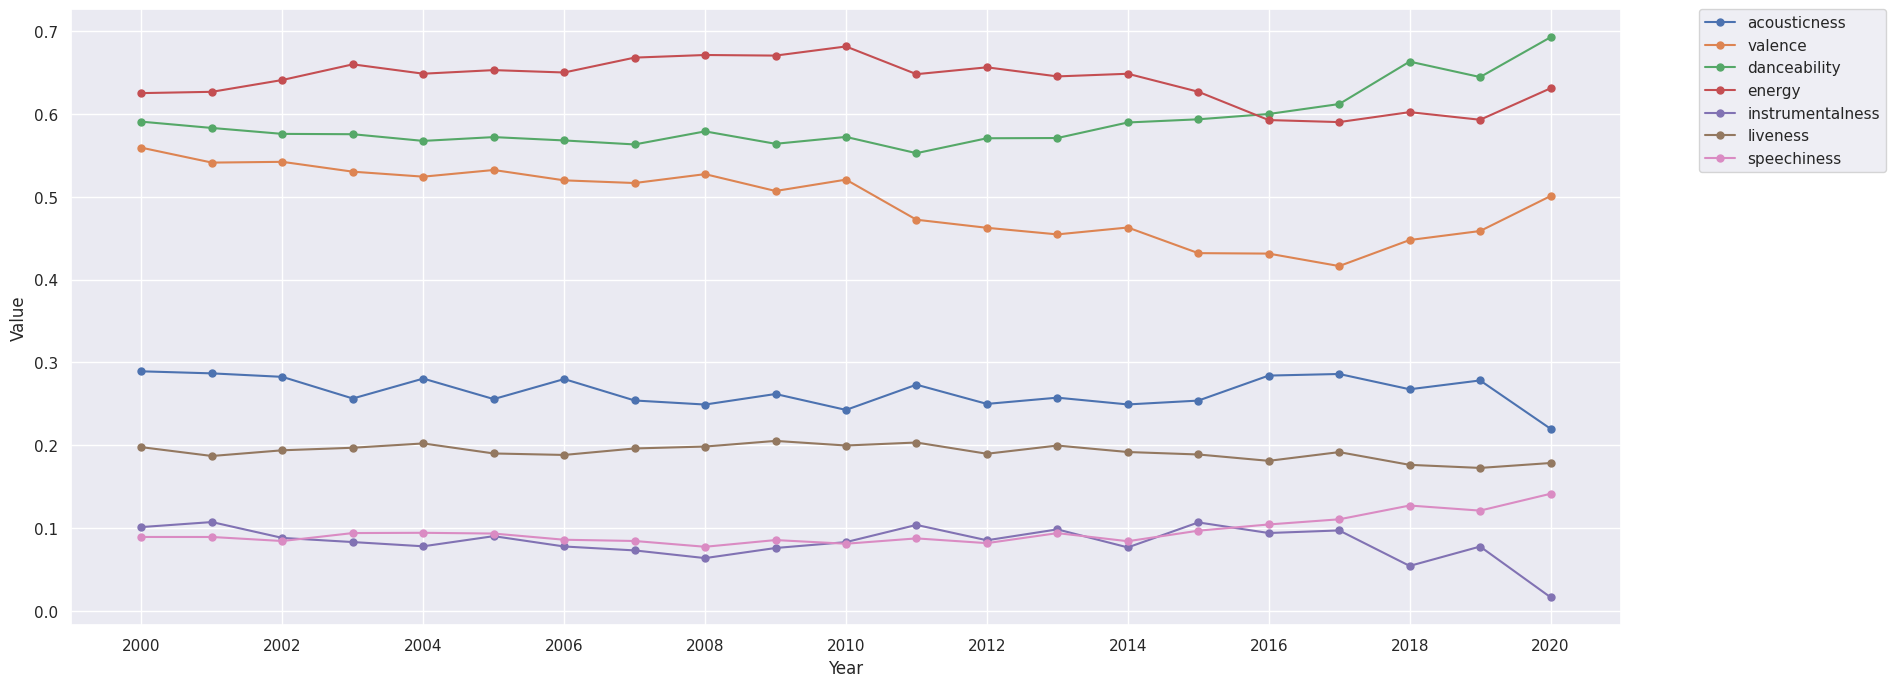

In [180]:
# Plotting various parameters over the years
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(df_yr["year"],df_yr["acousticness"],label="acousticness",marker=".",markersize=10)
plt.plot(df_yr["year"],df_yr["valence"],label="valence",marker=".",markersize=10)
plt.plot(df_yr["year"],df_yr["danceability"],label="danceability",marker=".",markersize=10)
plt.plot(df_yr["year"],df_yr["energy"],label="energy",marker=".",markersize=10)
plt.plot(df_yr["year"],df_yr["instrumentalness"],label="instrumentalness",marker=".",markersize=10)
plt.plot(df_yr["year"],df_yr["liveness"],label="liveness",marker=".",markersize=10)
plt.plot(df_yr["year"],df_yr["speechiness"],label="speechiness",marker=".",markersize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(np.arange(2000, 2021, 2))


<Axes: xlabel='release_yr', ylabel='count'>

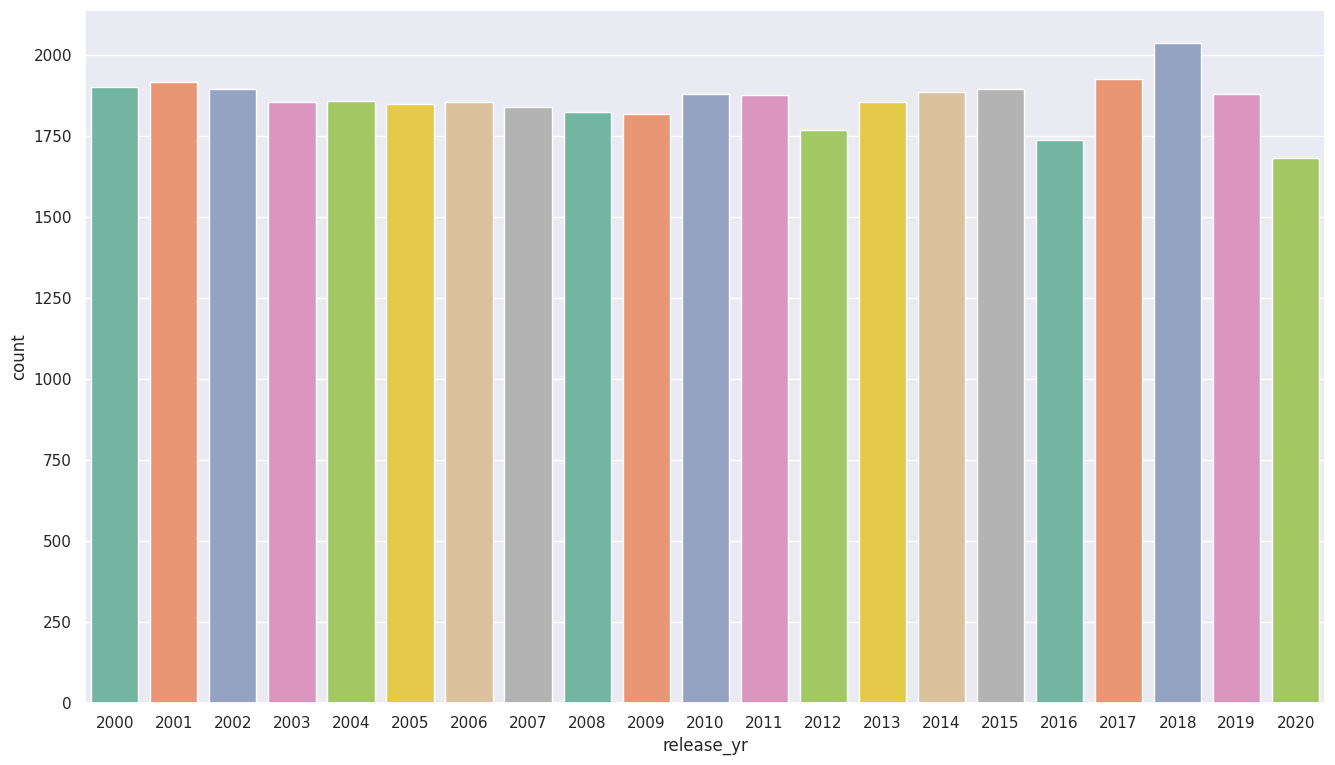

In [181]:
# count of songs released per year
sns.set(rc={'figure.figsize':(16 ,9)})
sns.countplot(x="release_yr", data=df, palette='Set2')


## Feature Co-relation

<Axes: >

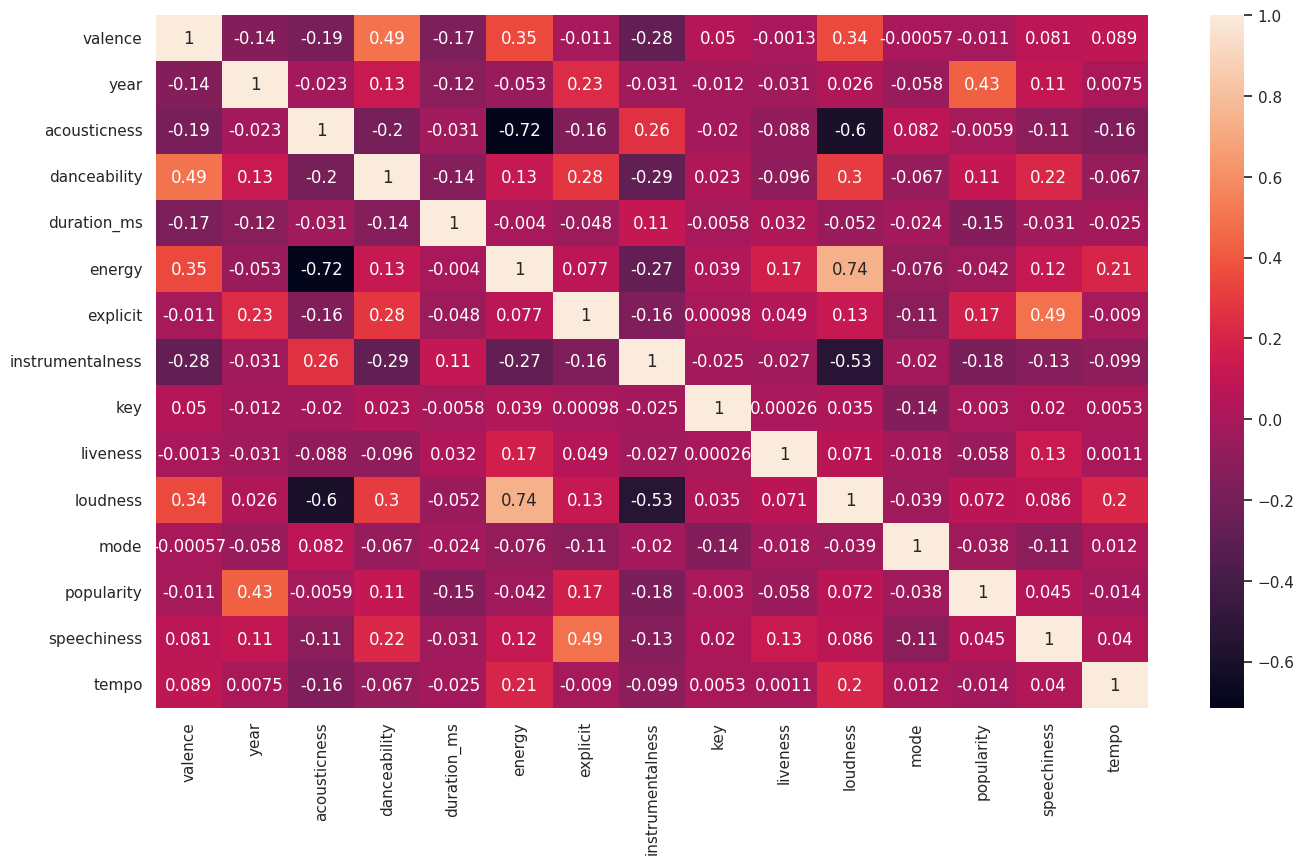

In [182]:
# heatmap of correlation between various numeric parameters
sns.set(rc={'figure.figsize':(16 ,9)})
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(),annot=True)


In [183]:
df["popularity"] = df["popularity"].apply(lambda x: x//5)
df.drop(["key","explicit","mode","year","release_date"],axis=1,inplace=True)
cols_float = []
for i in df.columns:
    if(df[i].dtype == float):
        cols_float.append(i)
cols_float.append("duration_ms")
df = df.explode("artists",ignore_index=True)


In [184]:
cols = [x for x in df_wgenres.columns]
cols = cols[2:]
df_wgenres.drop(labels=cols,axis=1,inplace=True)
df_wgenres.head()

,genres,artists
0,['show tunes'],"""Cats"" 1981 Original London Cast"
1,[],"""Cats"" 1983 Broadway Cast"
2,[],"""Fiddler On The Roof” Motion Picture Chorus"
3,[],"""Fiddler On The Roof” Motion Picture Orchestra"
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""..."


In [185]:
def strtoll2(text):
    text = re.sub(r" ", "_", text)
    text = re.sub("[\'\"\[\]]","",text)#no split here
    return text

In [186]:
df_wgenres["artists"] = df_wgenres["artists"].apply(strtoll2)
df = df.merge((df_wgenres),on="artists",how="left")

In [187]:
import math
def nanremover(x):
    if type(x) == float:
        if math.isnan(x):
            return []
    else:
        return x
df['genres'] = df['genres'].apply(nanremover)

In [188]:
df.head()

,valence,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,release_yr,artists_song,genres
0,0.285,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,16,0.0281,173.372,2000,Coldplay - Yellow,"['permanent wave', 'pop']"
1,0.613,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,16,0.2690,94.948,2000,OutKast - Ms. Jackson,"['atl hip hop', 'dirty south rap', 'hip hop', ..."
2,0.400,0.00958,Linkin_Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,16,0.0584,105.143,2000,Linkin_Park - In the End,"['alternative metal', 'nu metal', 'post-grunge..."
3,0.543,0.00664,3_Doors_Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,15,0.0286,99.009,2000,3_Doors_Down - Kryptonite,"['alternative metal', 'nu metal', 'pop rock', ..."
4,0.760,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,16,0.0572,104.504,2000,Eminem - The Real Slim Shady,"['detroit hip hop', 'hip hop', 'rap']"


In [196]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
def scalefunc(df, default = df):
    scaler = MinMaxScaler()
    df[cols_float] = scaler.fit_transform(df[cols_float])
    return df

In [198]:
df = scalefunc(df)

In [199]:
df.head()

,valence,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,release_yr,artists_song,genres
0,0.285,0.002400,Coldplay,0.435091,0.044010,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,0.858335,Yellow,16,0.029579,0.787700,2000,Coldplay - Yellow,"['permanent wave', 'pop']"
1,0.613,0.143574,OutKast,0.854970,0.044704,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,0.879170,Ms. Jackson,16,0.283158,0.431388,2000,OutKast - Ms. Jackson,"['atl hip hop', 'dirty south rap', 'hip hop', ..."
2,0.400,0.009618,Linkin_Park,0.563895,0.034724,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,0.880406,In the End,16,0.061474,0.477708,2000,Linkin_Park - In the End,"['alternative metal', 'nu metal', 'post-grunge..."
3,0.543,0.006667,3_Doors_Down,0.552738,0.037898,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,0.883041,Kryptonite,15,0.030105,0.449838,2000,3_Doors_Down - Kryptonite,"['alternative metal', 'nu metal', 'pop rock', ..."
4,0.760,0.030321,Eminem,0.962475,0.047253,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,0.906852,The Real Slim Shady,16,0.060211,0.474805,2000,Eminem - The Real Slim Shady,"['detroit hip hop', 'hip hop', 'rap']"


In [201]:
def strtoll3(text):
    text = re.sub("[\'\"\[\]]","",text).split(',')
    return text
def wsremover(text):
    for i in range(len(text)):
        text[i] = text[i].strip()
    return text 

df['genres'] = df['genres'].apply(lambda x: strtoll3(str(x)))
df['genres'] = df['genres'].apply(lambda x: wsremover(x))
(df.iloc[:5,-1])

0                                [permanent wave, pop]
1    [atl hip hop, dirty south rap, hip hop, rap, s...
2    [alternative metal, nu metal, post-grunge, rap...
3    [alternative metal, nu metal, pop rock, post-g...
4                      [detroit hip hop, hip hop, rap]
Name: genres, dtype: object

In [202]:
def onehotencoder(df, col, newname):
    tfdf = pd.get_dummies(df[col])
    featurenames = tfdf.columns
    tfdf.columns = [newname + ' | ' + str(i) for i in featurenames]
    tfdf.reset_index(drop = True, inplace = True)
    return tfdf 

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer
def featuresetcreator(df):
    tfidf = TfidfVectorizer()
    dmt = tfidf.fit_transform(df['genres'].apply(lambda x: ' '.join(x)))
    genredf = pd.DataFrame(dmt.toarray())
    genredf.columns = ["genre" + " | " + i for i in tfidf.get_feature_names_out()]
    genredf.reset_index(drop = True, inplace = True)
    yrdf = onehotencoder(df, 'release_yr', 'year')
    popdf = onehotencoder(df, 'popularity', 'pop')
    fin = pd.concat([df[cols_float], popdf, yrdf, genredf], axis = 1)
    fin['id'] = df['id']
    return fin
fin_features = featuresetcreator(df)



In [210]:
fin_features.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,duration_ms,pop | 0,pop | 1,pop | 2,pop | 4,pop | 6,pop | 7,pop | 8,pop | 9,pop | 10,pop | 11,pop | 12,pop | 13,pop | 14,pop | 15,pop | 16,pop | 17,pop | 18,pop | 19,pop | 20,year | 2000,year | 2001,year | 2002,year | 2003,year | 2004,year | 2005,year | 2006,year | 2007,year | 2008,year | 2009,year | 2010,year | 2011,year | 2012,year | 2013,year | 2014,year | 2015,year | 2016,year | 2017,year | 2018,year | 2019,year | 2020,genre | 21st,genre | 432hz,genre | abstract,genre | accordion,genre | acid,genre | acousmatic,genre | acoustic,genre | action,genre | adoracion,genre | adult,genre | advocacy,genre | afghan,genre | african,genre | afro,genre | afrobeat,genre | afrofuturism,genre | afropop,genre | afroswing,genre | age,genre | aggrotech,genre | ahead,genre | alabama,genre | alaska,genre | albanian,genre | albany,genre | alberta,genre | album,genre | albuquerque,genre | alley,genre | alt,genre | alternatif,genre | alternative,genre | ambeat,genre | ambient,genre | america,genre | american,genre | americana,genre | and,genre | andina,genre | anglican,genre | anime,genre | ann,genre | anthem,genre | anti,genre | antigo,genre | antiviral,genre | antonio,genre | appalachian,genre | arab,genre | arbor,genre | area,genre | arena,genre | argentina,genre | argentine,genre | argentino,genre | arizona,genre | arkansas,genre | art,genre | asbury,genre | asheville,genre | asian,genre | asmr,genre | athens,genre | atl,genre | atlanta,genre | atmosphere,genre | auckland,genre | audiophile,genre | aussietronica,genre | austin,genre | austindie,genre | australian,genre | austrian,genre | avant,genre | axe,genre | azonto,genre | azontobeats,genre | bachata,genre | background,genre | bahamian,genre | baiano,genre | bajki,genre | bakersfield,genre | ballet,genre | baltic,genre | baltimore,genre | band,genre | banda,genre | banjo,genre | bap,genre | barbadian,genre | barbershop,genre | baroque,genre | bass,genre | basshall,genre | bassline,genre | bath,genre | baton,genre | battle,genre | bay,genre | bboy,genre | bc,genre | beach,genre | beat,genre | beatboxing,genre | beatlesque,genre | beats,genre | bebop,genre | bedroom,genre | belarusian,genre | belgian,genre | belly,genre | bergen,genre | berlin,genre | bhajan,genre | bhangra,genre | big,genre | binaural,genre | birdsong,genre | birmingham,genre | bit,genre | bitpop,genre | black,genre | blackgaze,genre | bleep,genre | bluegrass,genre | blues,genre | bmore,genre | bolero,genre | bollywood,genre | boogaloo,genre | boogie,genre | boom,genre | bop,genre | bossa,genre | boston,genre | bounce,genre | bouncy,genre | bouzouki,genre | bow,genre | bowl,genre | box,genre | boy,genre | brain,genre | braindance,genre | brasileiro,genre | brass,genre | brazilian,genre | breakbeat,genre | breakcore,genre | breaks,genre | breton,genre | brighton,genre | brill,genre | brisbane,genre | bristol,genre | brit,genre | britain,genre | british,genre | britpop,genre | broadway,genre | bronx,genre | brooklyn,genre | brostep,genre | brutal,genre | bubble,genre | bubblegrunge,genre | bubblegum,genre | buffalo,genre | building,genre | c86,genre | cabaret,genre | cadence,genre | cafe,genre | cali,genre | caliente,genre | calming,genre | calypso,genre | cambridgeshire,genre | cameroonian,genre | canadian,genre | cancion,genre | candy,genre | cantautor,genre | cantopop,genre | canzone,genre | cape,genre | cappella,genre | carioca,genre | carnatic,genre | carnavalera,genre | carolina,genre | cartoon,genre | ccm,genre | cedm,genre | cello,genre | celtic,genre | century,genre | cha,genre | chakra,genre | chamber,genre | champeta,genre | channel,genre | chanson,genre | chant,genre | chaotic,genre | charlotte,genre | charlottesville,genre | chattanooga,genre | chicago,genre | chicano,genre | chicha,genre | chihuahua,genre | childrens,genre | chilean,genre | chilena,genre | chileno,genre | chill,genre | chillhop,genre | chillstep,genr